<h1 align="center">
  <span>Project</span>
  <span>Name</span>
  <span>-</span>
  <span>Lung</span>
  <span>Cancer</span>
  <span>Prediction</span>
  <span>.</span>
</h1>

<style>
    h1 {
        text-align: center;
        color: white;
        padding: 50px;
        border-radius: 12px;
        display: inline-block;
        background: linear-gradient(90deg, #1C3A13, #574F2A, #84732B, #EC4E20);
        background-size: 200% 200%;
        transition: background-position 0.6s ease, transform 0.4s ease;
        cursor: pointer;
    }

    h1 span {
        opacity: 0.3;
        display: inline-block;
        transform: translateY(20px);
        transition: opacity 0.4s ease, transform 0.4s ease;
    }

    h1:hover {
        background-position: 100% 0;
        transform: scale(1.05);
    }

    /* Staggered reveal effect */
    h1:hover span {
        opacity: 1;
        transform: translateY(0);
    }

    h1:hover span:nth-child(1) { transition-delay: 0s; }
    h1:hover span:nth-child(2) { transition-delay: 0.2s; }
    h1:hover span:nth-child(3) { transition-delay: 0.4s; }
    h1:hover span:nth-child(4) { transition-delay: 0.6s; }
    h1:hover span:nth-child(5) { transition-delay: 0.8s; }
    h1:hover span:nth-child(6) { transition-delay: 1.0s; }
    h1:hover span:nth-child(7) { transition-delay: 1.2s; }
</style>



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Member Name -** Kushang Shah

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Install Library if doesn't exist

In [224]:
!pip3 install -r requirements.txt

### Import Libraries

In [225]:
# Import Libraries
# Import Libraries
# Core Libraries
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For imbalance
from imblearn.over_sampling import SMOTE

# Statistical Tests
from scipy import stats

# Machine Learning (Preprocessing & Model Selection)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline 

# Machine Learning Models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, 
    classification_report, roc_curve, auc
)

# XGBoost
from xgboost import XGBClassifier

# Optional (to suppress warnings)
import warnings
warnings.filterwarnings('ignore')

# createing a folder to save dataframes
import os
try:
    os.mkdir("metricx_insight")
    print("metricx_insight created to store insights found on this notebook.")
except FileExistsError as r:
    print("File-metricx_insight already exist. don't worry.\nIt's used to store insights which are found from this notebook.")


File-metricx_insight already exist. don't worry.
It's used to store insights which are found from this notebook.


### Dataset Loading

In [226]:
# Load Dataset
lung_cancer_df = pd.read_csv('dataset_med.csv')

# copy the original dataset
df = lung_cancer_df.copy()

### Dataset First View

In [227]:
# Dataset First Look
print('Viewing the dataset:')
display(df)

Viewing the dataset:


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


### Dataset Rows & Columns count

In [228]:
# Dataset Rows & Columns count
print(f"Dataset Rows and Columns: \nNum of Rows: {df.shape[0]}\nNum of Columns: {df.shape[1]}")

Dataset Rows and Columns: 
Num of Rows: 890000
Num of Columns: 17


### Dataset Information

In [229]:
# Dataset Info
print("Dataset information: ")
df.info()

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatmen

#### Duplicate Values

In [230]:
# Dataset Duplicate Value Count
print(f"Num of duplicated rows in dataset: {df.duplicated().sum()}")

Num of duplicated rows in dataset: 0


#### Missing Values/Null Values

In [231]:
# Missing Values/Null Values Count
print(f"Num of missing values in dataset: \n{df.isna().sum()}")

Num of missing values in dataset: 
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


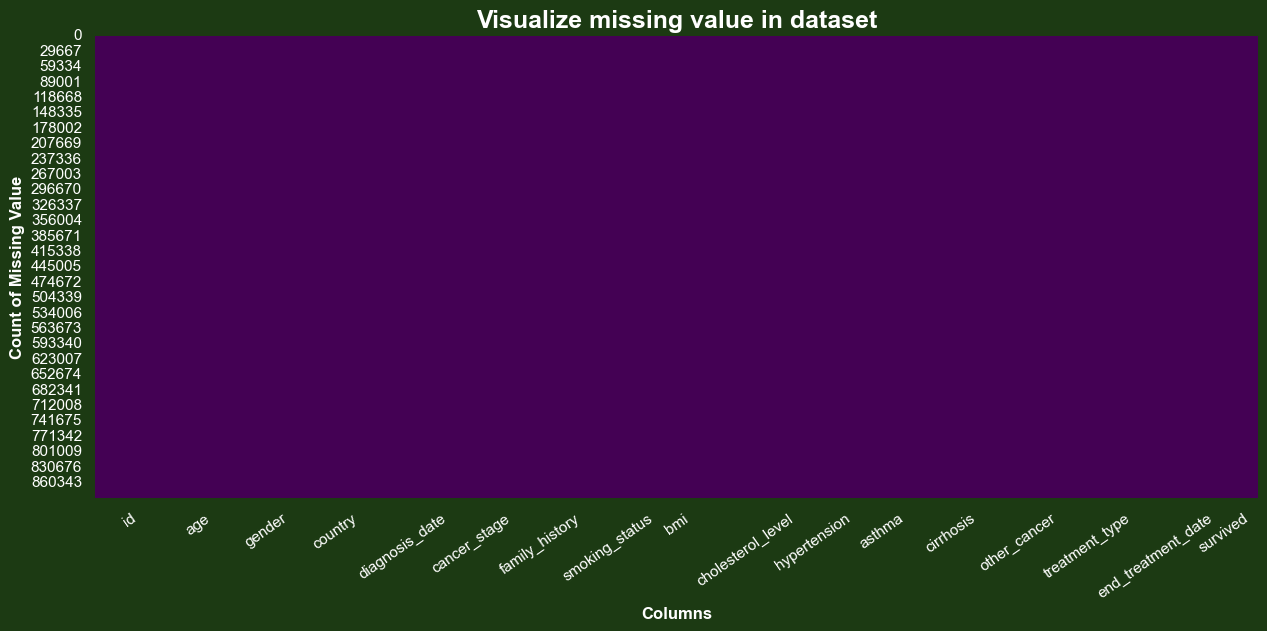

In [232]:
# Visualizing the missing values
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", rc={
    'figure.facecolor': "#1C3A13",    # whole figure background
    'axes.facecolor': "#484124",      # plot area background
    'axes.labelcolor': "white",
    'xtick.color': "white",
    'ytick.color': 'white',
    'text.color': "white",
    'axes.edgecolor': '#EC4E20',
    'grid.color': '#84732B'
})


# Visualizing the missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualize missing value in dataset", fontsize=18, weight='bold')
plt.xlabel("Columns", weight='bold')
plt.ylabel("Count of Missing Value", weight='bold')
plt.xticks(rotation=35)
plt.show()

### What did you know about your dataset?

---

Dataset Rows and Columns: 
Num of Rows: 890000
Num of Columns: 17

---

No duplicated rows in dataset.

---

No missing values in dataset.

## ***2. Understanding Your Variables***

In [233]:
# Dataset Columns
print(f"Name of columns: \n{[col for col in df.columns]}")

Name of columns: 
['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [234]:
# Dataset Describe
print("Dataset Description: ")
display(round(df.describe(), 2))

Dataset Description: 


,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00
mean,445000.50,55.01,30.49,233.63,0.75,0.47,0.23,0.09,0.22
std,256921.01,9.99,8.37,43.43,0.43,0.50,0.42,0.28,0.41
min,1.00,4.00,16.00,150.00,0.00,0.00,0.00,0.00,0.00
25%,222500.75,48.00,23.30,196.00,1.00,0.00,0.00,0.00,0.00
50%,445000.50,55.00,30.50,242.00,1.00,0.00,0.00,0.00,0.00
75%,667500.25,62.00,37.70,271.00,1.00,1.00,0.00,0.00,0.00
max,890000.00,104.00,45.00,300.00,1.00,1.00,1.00,1.00,1.00


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [235]:
unique_value = []
for col in df.columns:
    result = {
        'Colum' : col,
        'total unique values' : len(df[col].unique()),
        'Unique Values' : df[col].unique()
    }
    unique_value.append(result)
    print(f"{col} {len(df[col].unique())}")

id 890000
age 95
gender 2
country 27
diagnosis_date 3651
cancer_stage 4
family_history 2
smoking_status 4
bmi 291
cholesterol_level 151
hypertension 2
asthma 2
cirrhosis 2
other_cancer 2
treatment_type 4
end_treatment_date 4194
survived 2


In [236]:
unique_value

[{'Colum': 'id',
  'total unique values': 890000,
  'Unique Values': array([     1,      2,      3, ..., 889998, 889999, 890000],
        shape=(890000,))},
 {'Colum': 'age',
  'total unique values': 95,
  'Unique Values': array([ 64.,  50.,  65.,  51.,  37.,  49.,  56.,  48.,  47.,  67.,  45.,
          46.,  21.,  62.,  60.,  57.,  36.,  61.,  71.,  74.,  35.,  54.,
          44.,  68.,  59.,  58.,  63.,  69.,  70.,  52.,  40.,  78.,  75.,
          72.,  42.,  53.,  39.,  66.,  41.,  43.,  55.,  38.,  30.,  34.,
          76.,  73.,  80.,  31.,  85.,  28.,  79.,  87.,  77.,  33.,  32.,
          25.,  90.,  84.,  81.,  27.,  82.,  83.,  22.,  86.,  26.,  93.,
          29.,  23.,  19.,  24.,  89.,  18.,  91.,  95.,  88.,  20.,  94.,
         101.,  15.,  92.,  16.,  17.,  10.,  14.,  99.,  13.,  97.,   9.,
          12.,  98.,   7.,  96.,   4., 104.,   8.])},
 {'Colum': 'gender',
  'total unique values': 2,
  'Unique Values': array(['Male', 'Female'], dtype=object)},
 {'Colum': 'cou

In [237]:
unique_value_df = pd.DataFrame(unique_value)


unique_value_df.to_csv("metricx_insight/unique_values_in_dataset.csv", index=False)

# display(unique_value_df)
unique_value_df.iloc[:, :2]

,Colum,total unique values
0,id,890000
1,age,95
2,gender,2
3,country,27
4,diagnosis_date,3651
5,cancer_stage,4
6,family_history,2
7,smoking_status,4
8,bmi,291
9,cholesterol_level,151


## 3. ***Data Wrangling***

### Data Wrangling Code

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [239]:
# Write your code to make your dataset analysis ready.

# label encodeing the categorical columns
# let's split data into cat and numerical group
numeric_features = df.select_dtypes(include=['int64','float']).columns.tolist()
print("\nNumerical Feature: \n", numeric_features)

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Feature: \n", categorical_features)

# convert cat feature into numerical feature
label_encoders={}
for col in categorical_features:
    label_encoders[col]=LabelEncoder()
    df[col]=label_encoders[col].fit_transform(df[col])
    
print("\ndf after label encoding")    
display(df)

df


Numerical Feature: 
 ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

Categorical Feature: 
 ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']

df after label encoding


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,2951,3,0,3,44.8,243,1,1,1,0,2,3003,0
889996,889997,62.0,0,4,482,1,1,1,21.6,240,0,0,0,0,3,928,0
889997,889998,48.0,0,7,664,2,1,2,38.6,242,1,0,0,0,1,781,1
889998,889999,67.0,0,23,568,3,1,1,18.6,194,1,1,0,0,0,1104,0


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,2951,3,0,3,44.8,243,1,1,1,0,2,3003,0
889996,889997,62.0,0,4,482,1,1,1,21.6,240,0,0,0,0,3,928,0
889997,889998,48.0,0,7,664,2,1,2,38.6,242,1,0,0,0,1,781,1
889998,889999,67.0,0,23,568,3,1,1,18.6,194,1,1,0,0,0,1104,0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   diagnosis_date      890000 non-null  int64  
 5   cancer_stage        890000 non-null  int64  
 6   family_history      890000 non-null  int64  
 7   smoking_status      890000 non-null  int64  
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  int64  
 15  end_treatment_date  890000 non-nul

### What all manipulations have you done and insights you found?

| **Column**                | **Total Unique Values** | **Description**                                                                               |
|---------------------------|-------------------------|-----------------------------------------------------------------------------------------------|
| id                        | 890,000                 | Unique identifier for each patient.                                                          |
| age                       | 95                      | Patient's age at diagnosis.                                                                   |
| gender                    | 2                       | Patient's gender (e.g., male, female).                                                      |
| country                   | 27                      | Patient's country or region of residence.                                                    |
| diagnosis_date            | 3,651                   | Date of lung cancer diagnosis.                                                                |
| cancer_stage              | 4                       | Stage of lung cancer at diagnosis (e.g., Stage I, Stage II, Stage III, Stage IV).           |
| family_history            | 2                       | Whether there is a family history of cancer (e.g., yes, no).                                |
| smoking_status            | 4                       | Patient's smoking status (e.g., current smoker, former smoker, never smoked, passive smoker).|
| bmi                       | 291                     | Patient's Body Mass Index at diagnosis.                                                      |
| cholesterol_level         | 151                     | Patient's cholesterol level (value).                                                         |
| hypertension              | 2                       | Whether the patient has high blood pressure (e.g., yes, no).                                 |
| asthma                    | 2                       | Whether the patient has asthma (e.g., yes, no).                                             |
| cirrhosis                 | 2                       | Whether the patient has liver cirrhosis (e.g., yes, no).                                    |
| other_cancer              | 2                       | Whether the patient has had another type of cancer besides the primary diagnosis (e.g., yes, no).|
| treatment_type            | 4                       | Type of treatment received (e.g., surgery, chemotherapy, radiation, combined).               |
| end_treatment_date        | 4,194                   | Date when the patient completed treatment or died.                                           |
| survived                  | 2                       | Whether the patient survived (e.g., yes, no).                                              |


---

turned categorical feature label into numerical type. i,e., Object -> int/float

---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [241]:
df.head(1)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0


#### Chart - 1: Distribution of Patient Ages

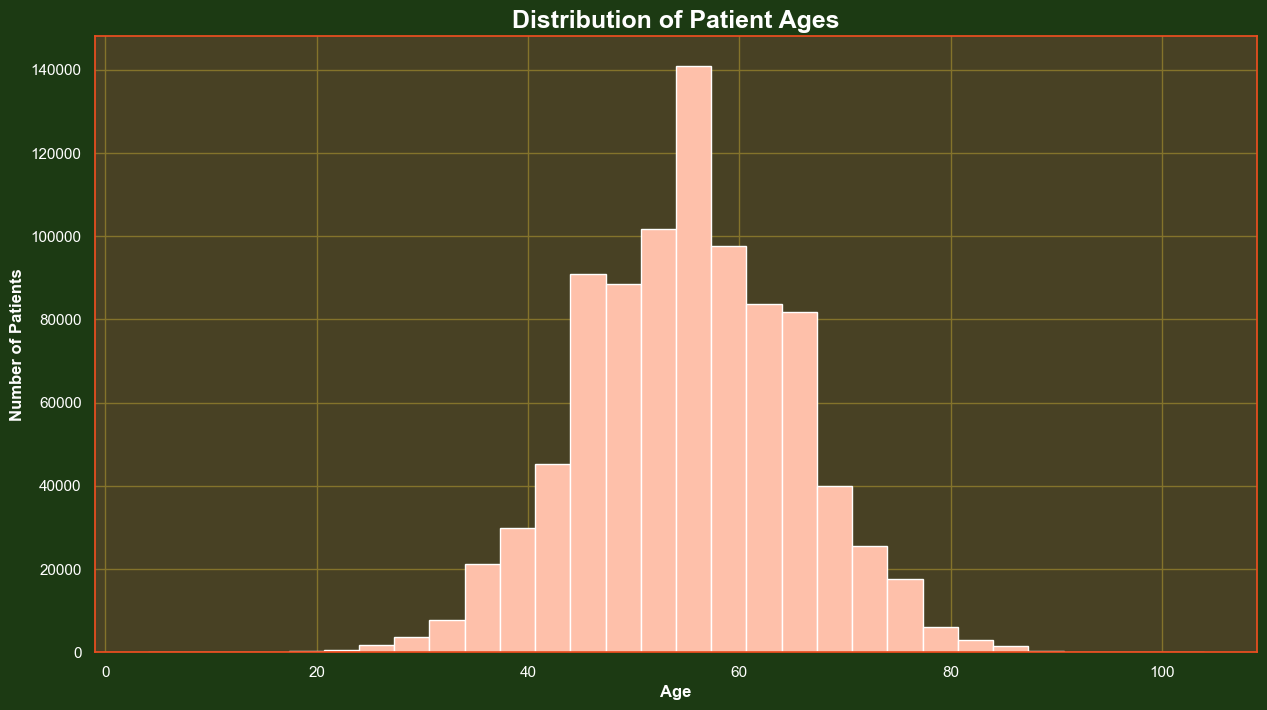

In [242]:
# Chart - 1 Distribution of Patient Ages
plt.figure(figsize=(15, 8))
ax = plt.hist(df['age'], bins=30, color="#FEC0AA")
plt.title("Distribution of Patient Ages", weight='bold', fontsize=18)
plt.xlabel("Age", weight='bold')
plt.ylabel("Number of Patients", weight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

To understand which age group has more lung cancer diagnoses.

##### 2. What is/are the insight(s) found from the chart?

Most diagnoses occur between 55–70 years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Awareness programs and screenings should target middle-aged adults.

#### Chart - 2: Gender Distribution

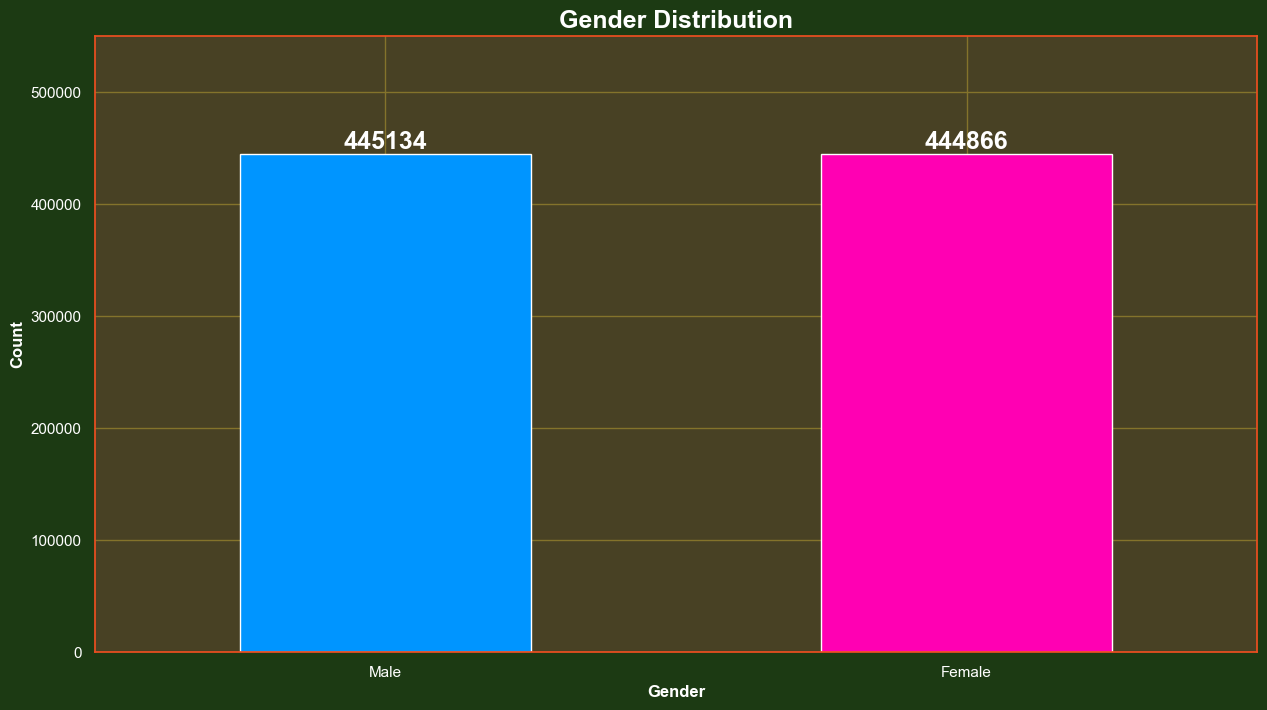

In [243]:
# Chart - 2 Gender Distribution
mf_pallate = ["#0095FF", "#FF00B3"]

plt.figure(figsize=(15, 8))
ax = df['gender'].value_counts().plot(kind='bar', color=mf_pallate)
plt.title("Gender Distribution", weight='bold', fontsize=18)
plt.xlabel("Gender", weight='bold')
plt.ylabel("Count", weight='bold')
plt.ylim(0, 550000)
ax.set_xticklabels(["Male", "Female"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', weight='bold', fontsize=18)

plt.show()


##### 1. Why did you pick the specific chart?

Bar plot.

##### 2. What is/are the insight(s) found from the chart?

If males dominate, campaigns can focus on male smoking habits.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Better-targeted prevention awareness → positive impact.

#### Chart - 3

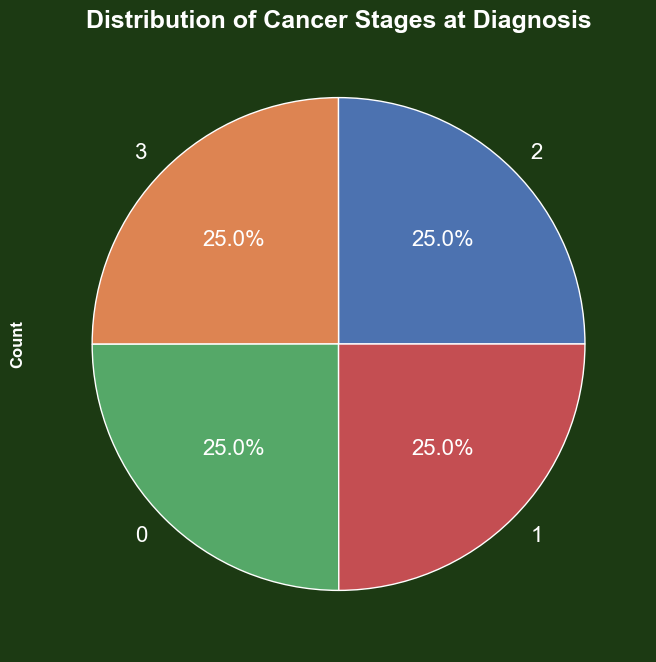

In [244]:
# Chart - 3 visualization code

plt.figure(figsize=(15, 8))
df['cancer_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize=16)
plt.title("Distribution of Cancer Stages at Diagnosis", weight='bold', fontsize=18)
plt.ylabel("Count", weight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart.

##### 2. What is/are the insight(s) found from the chart?

A high proportion in Stage III–IV shows late detection.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates the need for early screening programs.

#### Chart - 4: Smoking Status of Patients

In [245]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [246]:
df['smoking_status']

0         3
1         3
2         1
3         3
4         3
         ..
889995    3
889996    1
889997    2
889998    1
889999    0
Name: smoking_status, Length: 890000, dtype: int64

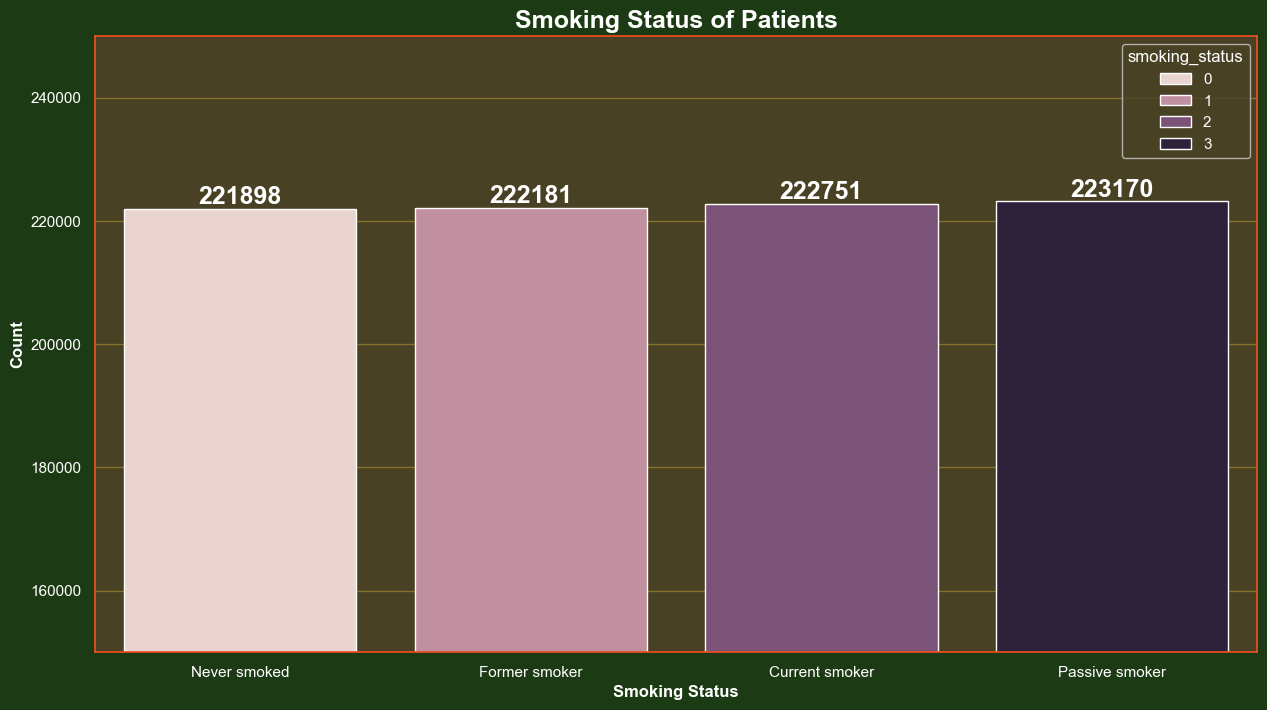

In [247]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='smoking_status', data=df, hue='smoking_status')
plt.title("Smoking Status of Patients", weight='bold', fontsize=18)
plt.xlabel("Smoking Status", weight='bold')
plt.ylabel("Count", weight='bold')
plt.xticks(rotation=0)
plt.ylim(150000, 250000)

# Change tick labels
ax.set_xticklabels(['Never smoked', 'Former smoker', 'Current smoker', 'Passive smoker'])


# Add labels on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', weight='bold', fontsize=18
    )

plt.show()


##### 1. Why did you pick the specific chart?

Bar Chart

##### 2. What is/are the insight(s) found from the chart?

If “current smokers” are majority, anti-smoking drives are crucial.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Reducing smoking prevalence → long-term positive growth in public health.

#### Chart - 5

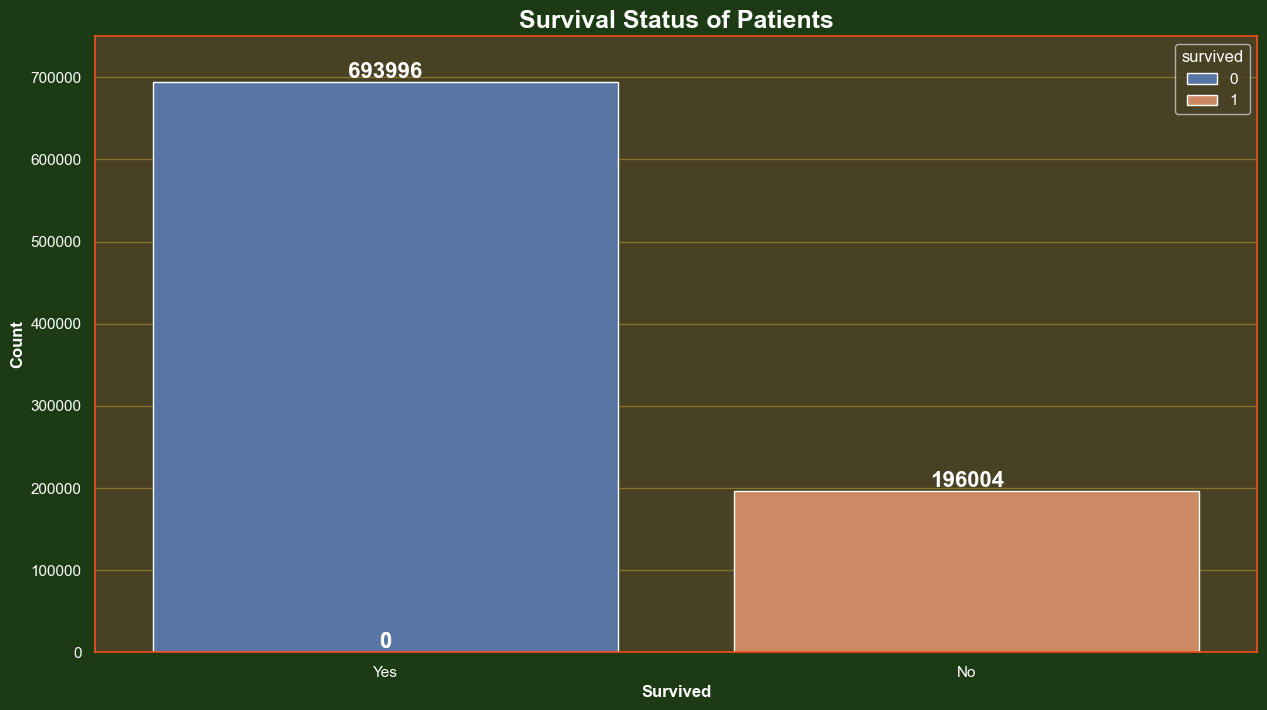

In [248]:
# Chart - 5 visualization code
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='survived', data=df, hue='survived')
plt.title("Survival Status of Patients", weight='bold', fontsize=18)
plt.xlabel("Survived", weight='bold')
plt.ylabel("Count", weight='bold')
plt.ylim(0, 750000)
ax.set_xticklabels(["Yes", "No"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=16, weight='bold'
    )

plt.show()


##### 1. Why did you pick the specific chart?

Count Plot

##### 2. What is/are the insight(s) found from the chart?

If survival rate < 50%, it’s alarming → need to improve treatment access.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights potential healthcare improvement areas.

#### Chart - 6: Age vs Survival

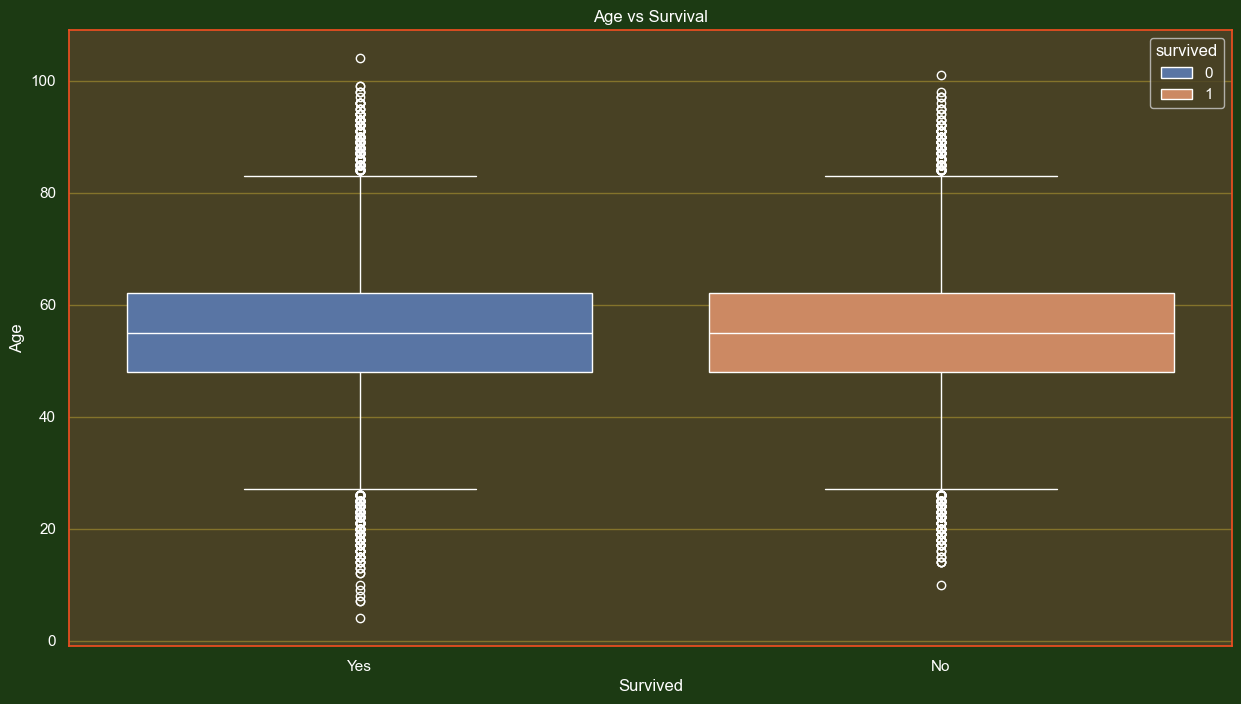

In [249]:
# Chart - 6 visualization code
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='survived', y='age', data=df, linecolor='white', hue='survived')
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
ax.set_xticklabels(["Yes", "No"])    
plt.show()


##### 1. Why did you pick the specific chart?

Box Plot

##### 2. What is/are the insight(s) found from the chart?

Older patients may have lower survival chances.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Helps prioritize early interventions for elderly patients.

#### Chart - 7: Smoking Status vs Survival

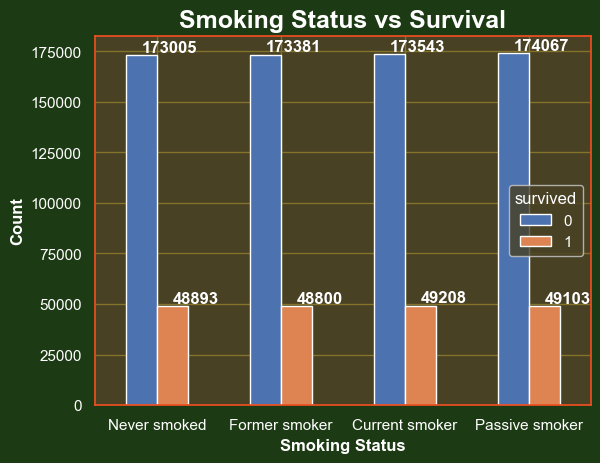

In [308]:
# Chart - 7 visualization code
# plt.figure(figsize=(15, 8))
ax = pd.crosstab(df['smoking_status'], df['survived']).plot(kind='bar', stacked=False)
plt.title("Smoking Status vs Survival", weight='bold', fontsize=18)
plt.xlabel("Smoking Status", weight='bold')
plt.ylabel("Count", weight='bold')
ax.set_xticklabels(['Never smoked', 'Former smoker', 'Current smoker', 'Passive smoker'])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='left', va='bottom', fontsize=12, weight='bold'
    )
plt.show()


##### 1. Why did you pick the specific chart?

Bar plot.

##### 2. What is/are the insight(s) found from the chart?

“Never smoked” group might show higher survival rates.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Reinforces anti-smoking campaigns as life-saving measures.

#### Chart - 8: BMI vs Survival

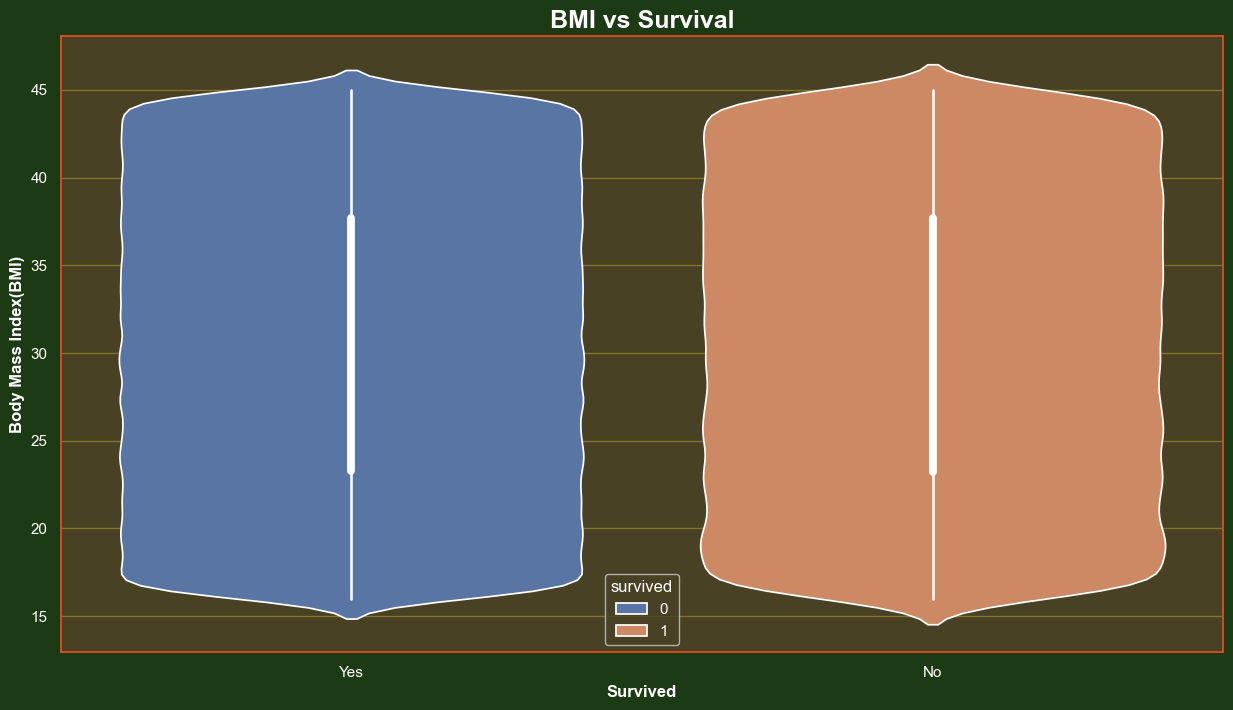

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15, 8))
ax= sns.violinplot(x='survived', y='bmi', data=df,
                   hue='survived', linecolor='white')

plt.title("BMI vs Survival", weight='bold', fontsize=18)
plt.xlabel("Survived", weight='bold')
plt.ylabel("Body Mass Index(BMI)", weight='bold')

ax.set_xticklabels(["Yes", "No"])
plt.xticks(rotation=0)

plt.show()


##### 1. Why did you pick the specific chart?

Violine Plot

##### 2. What is/are the insight(s) found from the chart?

Underweight or obese patients may have worse outcomes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Encourage maintaining healthy BMI → preventive health growth.

#### Chart - 9

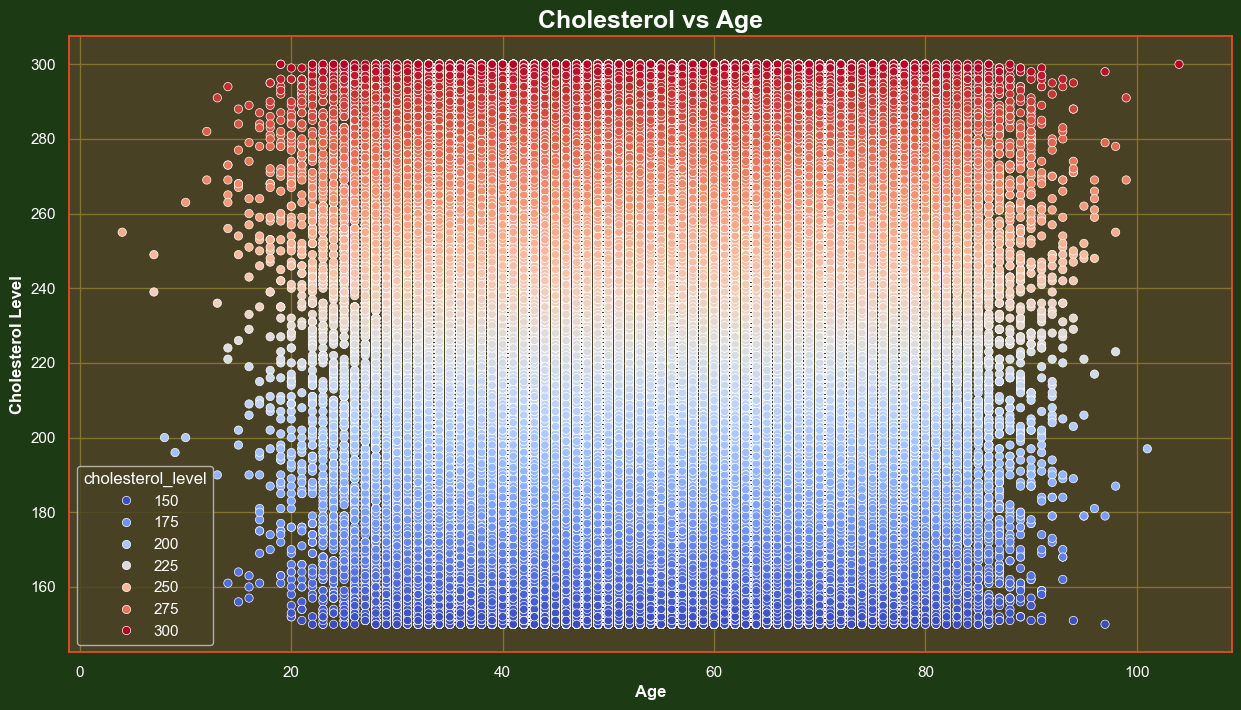

In [324]:

# Chart - 9 visualization code
plt.figure(figsize=(15, 8))
sns.scatterplot(x='age', y='cholesterol_level', data=df,
                hue='cholesterol_level', palette='coolwarm')

plt.title("Cholesterol vs Age", fontsize=18, weight='bold')
plt.xlabel("Age", weight='bold')
plt.ylabel("Cholesterol Level", weight='bold')

plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot

##### 2. What is/are the insight(s) found from the chart?

Older individuals tend to have higher cholesterol.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for lifestyle disease management.

#### Chart - 10

In [253]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [254]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [255]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [256]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [257]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [258]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [259]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [260]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [261]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [262]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [263]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [264]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [265]:
# Expand Contraction

#### 2. Lower Casing

In [266]:
# Lower Casing

#### 3. Removing Punctuations

In [267]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [268]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [269]:
# Remove Stopwords

In [270]:
# Remove White spaces

#### 6. Rephrase Text

In [271]:
# Rephrase Text

#### 7. Tokenization

In [272]:
# Tokenization

#### 8. Text Normalization

In [273]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [274]:
# POS Taging

#### 10. Text Vectorization

In [275]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [276]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [277]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [278]:
# Transform Your data

### 6. Data Scaling

In [279]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [280]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [281]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [282]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [283]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [284]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [285]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [286]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [287]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [288]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [289]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [290]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [291]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [292]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***